# Why Is 10-Year Yield So Important

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The drivers of short-term U.S. Treasury yields are relatively clear. In general, __two-year Treasury yields__ can be viewed as a compunding of two years' worth of __daily federal funds rate expectations__, with small adjustments for liquidity disparties and other factors. However, when it comes to __10-year Treasuries__, economic factors like __inflation, economic growth,__ and __Federal Reserve's (Fed) monetary policy__, among others, play important roles. The 10-year yield is considered to reflect __the average expected short-term interest rates over the next 10 years plus term premium__. Let's break this down.

## Expectations of Future Short-Term Rates
The Fed sets the federal funds rate (FFR) and it indirectly controls other short-term interest rates through it. The Fed tightens monetary policy by raising the FFR to slow the economy when it is overheating and cuts the rate to stimulate spending when the economy falters. __The 10-year yield is in turn strongly influenced by expectations of the future path of short-term interest rates.__ Consequently, the 10-year rate tends to be high, relative to the FFR, when investors expect tighter monetary policy in the future. Conversely, declines in the 10-year rate, relative to the FFR, often foreshadow looser policy. 

### Visualization: 2-Year Treasury Yield vs. FFR Target Rate

In [2]:
# Nominal
treasury_yield_2025 = pd.read_csv('US_Daily_Treasury_Par_Yield_Curve_Rates/daily-treasury-rates.csv', parse_dates=['Date'])
treasury_yield_history = pd.read_csv('US_Daily_Treasury_Par_Yield_Curve_Rates/yield-curve-rates-1990-2024.csv', parse_dates=['Date'])
nominal = pd.concat([treasury_yield_2025, treasury_yield_history], axis=0).set_index('Date').sort_index()

# Real
real_treasury_yield_2025 = pd.read_csv('US_Daily_Treasury_Par_Real_Yield_Curve_Rates/daily-treasury-rates.csv', parse_dates=['Date'])
real_treasury_yield_history = pd.read_csv('US_Daily_Treasury_Par_Real_Yield_Curve_Rates/par-real-yield-curve-rates-2003-2024.csv', parse_dates=['Date'])
real = pd.concat([real_treasury_yield_2025, real_treasury_yield_history], axis=0).set_index('Date').sort_index()

# FFR
FFR = pd.read_excel('US_Historical_FFR.xlsx' , parse_dates=['Date']).set_index('Date').sort_index()

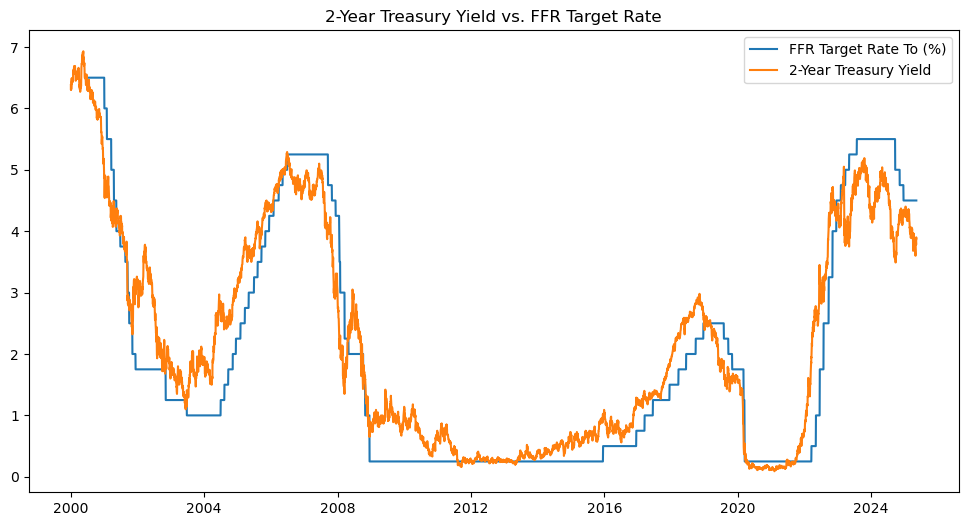

In [3]:
start_date = '2000-01-01'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(FFR.loc[start_date:end_date].index, FFR.loc[start_date:end_date, 'Target Rate To (%)'], label='FFR Target Rate To (%)')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'2 Yr'], label='2-Year Treasury Yield')

plt.title('2-Year Treasury Yield vs. FFR Target Rate')
plt.legend();

This suggests that investors' expectations regarding changes in the Fed's interest rate policy are generally accurate, and the 2-year Treasury yield is a strong indicator of future short-term Fed rate changes.

### Visualization: 10-Year Treasury Yield vs. FFR Target Rate

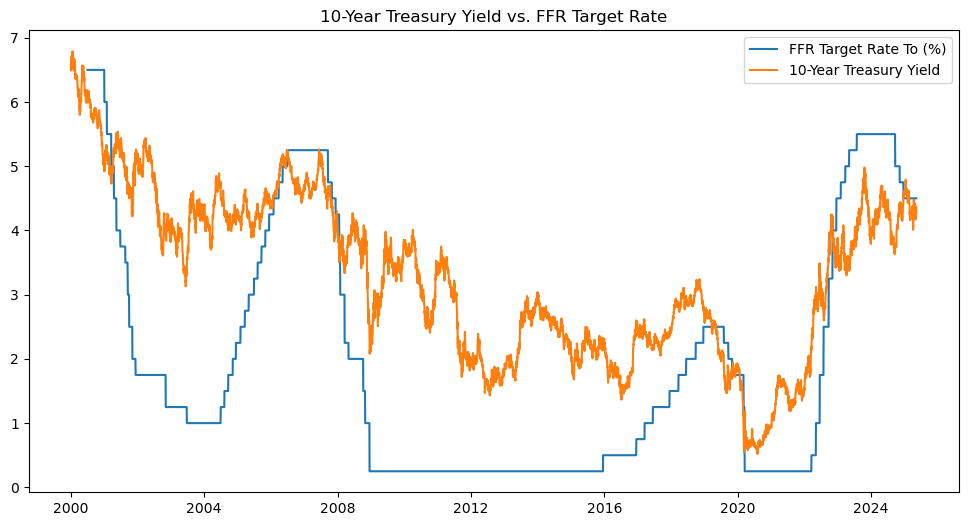

In [4]:
start_date = '2000-01-01'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(FFR.loc[start_date:end_date].index, FFR.loc[start_date:end_date, 'Target Rate To (%)'], label='FFR Target Rate To (%)')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'10 Yr'], label='10-Year Treasury Yield')

plt.title('10-Year Treasury Yield vs. FFR Target Rate')
plt.legend();

We can observe some correlation, but they diverge more often than the 2-year Treasury yield, as the 10-year Treasury yeild is influenced by __longer-term__ expectations of economic growth, inflation, Fed policy, term premiums, and other risk factors.

### Visualization: FFR Target Rate vs. 2-Year Treasury Yield vs. 10-Year Treasury Yield

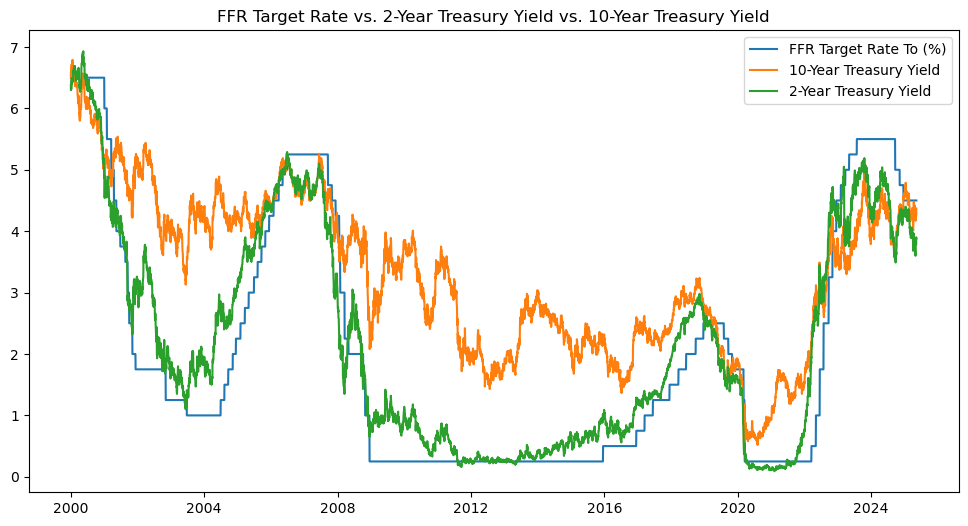

In [5]:
start_date = '2000-01-01'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(FFR.loc[start_date:end_date].index, FFR.loc[start_date:end_date, 'Target Rate To (%)'], label='FFR Target Rate To (%)')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'10 Yr'], label='10-Year Treasury Yield')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'2 Yr'], label='2-Year Treasury Yield')

plt.title('FFR Target Rate vs. 2-Year Treasury Yield vs. 10-Year Treasury Yield')
plt.legend();

## Expectations of Future Inflation
Long-term yields are also considered to be determined by an expected inflation. As such, the expectation of increased (reduced) inflation in the future could lead to fixed-income investments becoming less (more) appealing as the value of those future fixed-income declines. Consequently, yields will rise as investors demand higher returns to offset the erosion of purchasing power. 

### Visualization: 10-Year Yield vs. Expected Inflation

The __breakeven inflation rate__ is a measurement that aims to predict __the effects of inflation.__ Though this measurement is neither perfect nor guaranteed, __it provides a look at possible inflation trends in the future.__ In order to calculate a breakeven inflation rate for U.S. 10-year Treasuries, one needs to simply compare the yield of an TIPS — or Treasury inflation-protected securities — with the yield of an nominal bond. The difference between how the two have performed during that time frame represents the breakdown inflation rate, or the rate that inflation would have to be for an investor to "break even" — between purchasing TIPS or nominal Treasuries.

For example, let's say that you have a 10-year certificate of deposit that has yielded 5% over the course of the investment (nominal yield). <br><br>
$$\text{Future Value} = $100 * (1.05)^{10}$$
<br>
You also hold an inflation-linked investment that has yielded 2.9% over the same time period (real yield). 
In this case, your breakdown inflation rate is 2.1%. This would indicate that over the next 10 years, today's investors expect inflation to average around 2.1%. 

$$\text{Future Value} = $100 * (1.029 * 1.021)^{10}$$

Note that bond yields are annualized rates, so the difference is also an annualized rate. For this inflation-linked investment to at least end up at the same place as the regular CD, inflation difference must be 2.1% per year.
 

If you believe that in the next 10 years, inflation will average more than 2.1% per year, you may want to consider purchasing TIPS. If you believe that inflation will average less than 2.1% in the coming decade, nominal Treasury might be the better choice for your portfolio.

In [6]:
breakeven_inflation = pd.concat([nominal['10 Yr'], real['10 YR']], axis=1).dropna()
breakeven_inflation['breakeven_inflation_rate'] = breakeven_inflation['10 Yr'] - breakeven_inflation['10 YR']

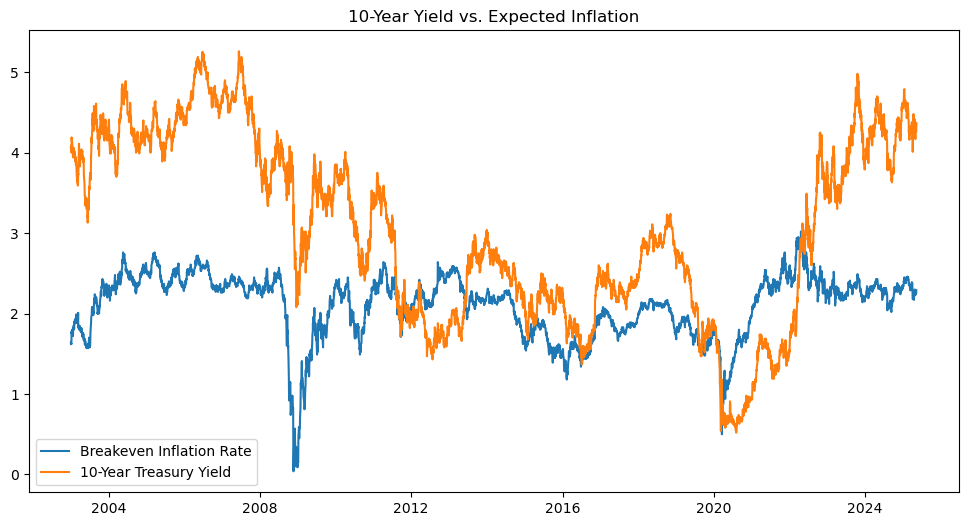

In [7]:
start_date = '2003-01-02'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(breakeven_inflation.loc[start_date:end_date].index, breakeven_inflation.loc[start_date:end_date, 'breakeven_inflation_rate'], label='Breakeven Inflation Rate')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'10 Yr'], label='10-Year Treasury Yield')

plt.title('10-Year Yield vs. Expected Inflation')
plt.legend();

### Visualization: Expected Inflation vs. Core PCE Price Index

Core PCE is commonly used to assess the actual inflatino rate. In theory, if investors' expecations are efficient, then Core PCE should generally follow the trend of breakdown inflation over time. Of course, the relationship is not going to be perfect as events like oil crises or pandemics can cause actual inflation to deviate sharply from prior expectations or the Fed may act (e.g., hike rates) if breakdown inflation rises, preventing actual inflation from following expected inflation.

In [8]:
PCE = pd.read_csv('US_PCE_by_Month_SA.csv', parse_dates=['Date']).set_index('Date').sort_index()

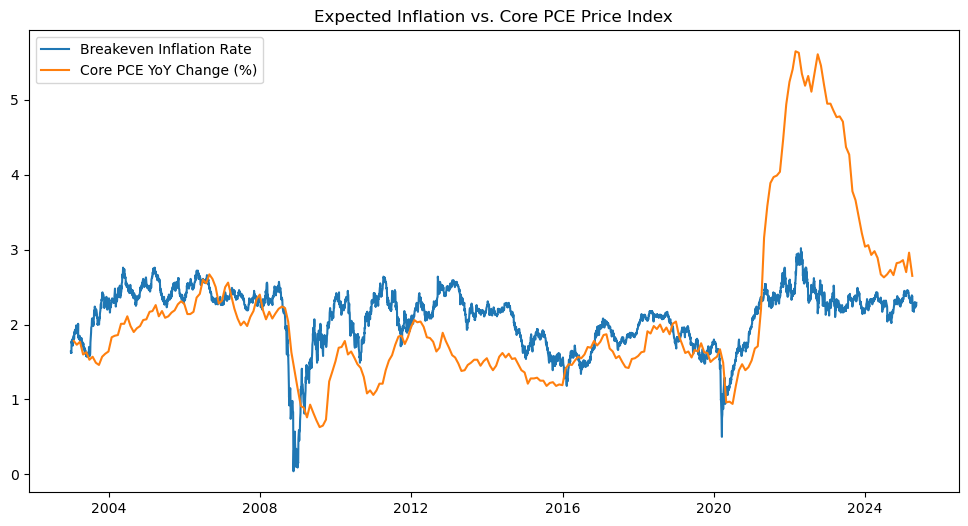

In [9]:
start_date = '2003-01-02'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(breakeven_inflation.loc[start_date:end_date].index, breakeven_inflation.loc[start_date:end_date, 'breakeven_inflation_rate'], label='Breakeven Inflation Rate')
plt.plot(PCE.loc[start_date:end_date].index, PCE.loc[start_date:end_date,'Core PCE YoY Change %'], label='Core PCE YoY Change (%)')

plt.title('Expected Inflation vs. Core PCE Price Index')
plt.legend();

The above chart shows Core PCE often lags and loosely follows the breakeven inflation rate.

### Visualization: Expected Inflation vs. Headline PCE Price Index
Headline PCE includes volatile energy and food categories.

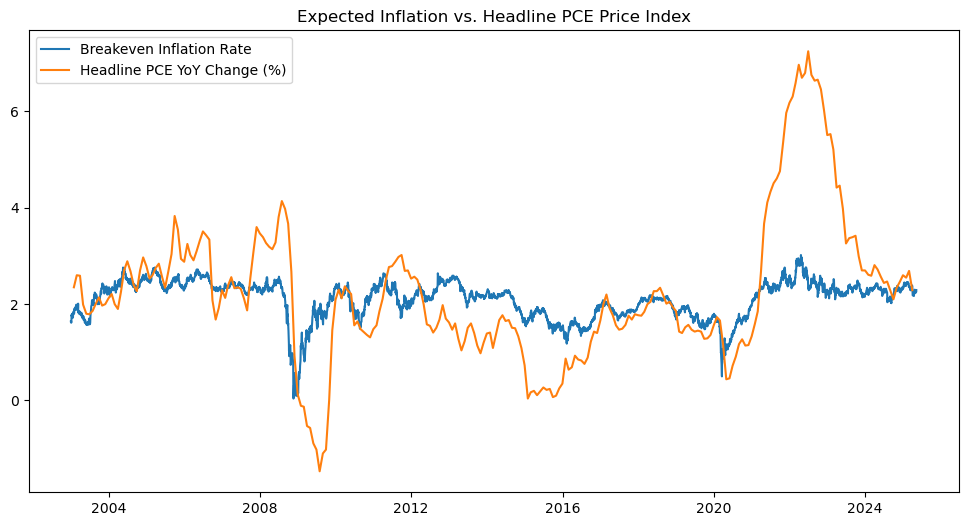

In [10]:
start_date = '2003-01-02'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(breakeven_inflation.loc[start_date:end_date].index, breakeven_inflation.loc[start_date:end_date, 'breakeven_inflation_rate'], label='Breakeven Inflation Rate')
plt.plot(PCE.loc[start_date:end_date].index, PCE.loc[start_date:end_date,'PCE YoY Change %'], label='Headline PCE YoY Change (%)')

plt.title('Expected Inflation vs. Headline PCE Price Index')
plt.legend();

## Expectations of Future Economic Growth
Economic growth expectations also impact long-term Treasury yields. A rising yield often suggests that investors expect stronger economic growth and higher inflation which prompts them to demand higher returns. When the economy is strong, investments in higher-yielding assets like stocks typically become more active, and investors may demand the higher 10-year yield to compensate for the opportunity cost of investing in safer government bonds. A declining yield indicates that investors are seeking safety amid economic uncertainty which can be a sign of anticipated economic slowdown or recession, driving prices up and yields down due to the increased demand.

While GDP is the most frequently trqacked measure of economic growth, measuring __future economic growth expectations__ involves piecing together clues from markets (or prices), expert forecasts, and sentiment (or surveys).

### Visualization: 10-Year Treasury Yield vs. Unemployment Rate

In [11]:
UEMP = pd.read_excel('US_Historical_Unemployment_Rate.xlsx' , parse_dates=['Month']).set_index('Month').sort_index()

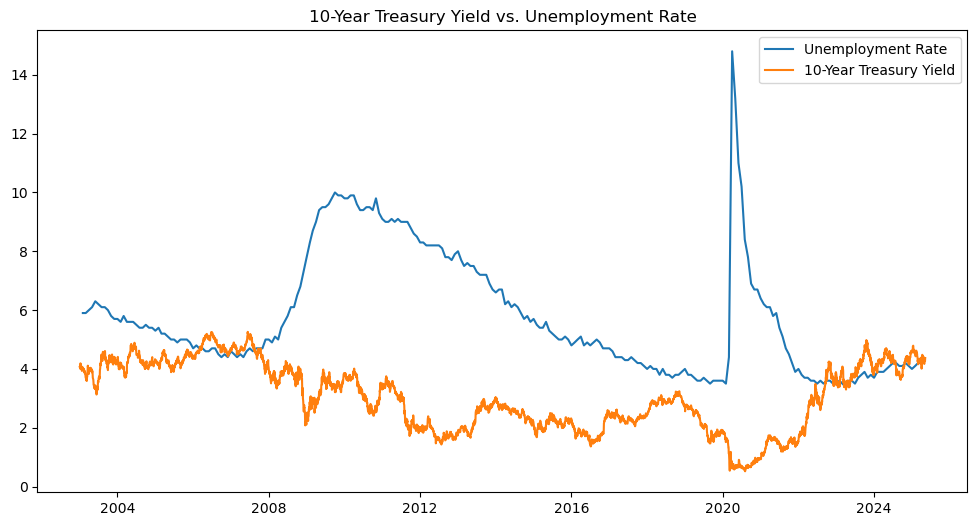

In [12]:
start_date = '2003-01-02'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(UEMP.loc[start_date:end_date].index, UEMP.loc[start_date:end_date, 'Unemployment Rate'], label='Unemployment Rate')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'10 Yr'], label='10-Year Treasury Yield')

plt.title('10-Year Treasury Yield vs. Unemployment Rate')
plt.legend();

#### Quick Recap:
Investors assess future economic conditions — such as inflation, economic growth, labor market strength — which shape expectations of future monetary policy, particularly the path of the FFR. Stronger economic performance typically leads to expectations of a higher FFR. Since the FFR serves as the anchor for short-term rates, expectations about its future path directly influence expected short-term rates over time. When investors anticipate a sustained rise in short-term rates, they demand higher yields on long-term bonds to compensate for the opportunity cost of holding lower-yielding assets in a rising-rate environment. This upward adjustment in required returns causes long-term yields to rise.


## Interest Rate Risk Between Long-Term and Short-Term Bonds
__Long-term bonds are most sensitive to interest rate changes.__ An important concept for understanding interest rate risk in bonds is that bond prices are __inversely__ related to interest rates. When interest rates go up, bond prices go down, and vice versa. There are two primary reasons why long-term bonds are subject to greater interest rate risk than short-term bonds:

1. __Probability:__ There is a greater probability that interest rates will rise (and thus negatively affect a bond's market price) within a longer time period than within a shorter period. As a result, investors who buy long-term bonds but then attempt to sell them before maturity may be faced with a deeply discounted market price when they want to sell their bonds. With short-term bonds, this risk is not as significant because interest rates are less likely to substantially change in the short term. Short-term bonds are also easier to hold until maturity, thereby alleviating an investor's concern about the effect of interest rate-driven changes in the price of bonds. <br>
<br>
2. __Duration:__ Long-term bonds have a greater duration than short-term bonds. Duration measures __the sensitivity of a bond's price to changes in interest rates.__ It tells you roughly how much the price of a bond will move if interest rates change. For example, if a bond has a duration of 2 years and interest rates rise by 1%, the bond's price falls by ~2%. If the duration was 10 years instead, the bond's price falls by ~10%. Because of this, a given interest rate change will have a greater effect on long-term bonds than on short-term bonds. This concept of duration can be difficult to conceptualize but just think of it as the length of time that your bond will be affected by an interest rate change. For instance, suppose interest rates rise today by 0.25%. A bond with only one coupon payment left until maturity will be underpaying the investor by 0.25% for only one coupon payment. On the other hand, a bond with 20 coupon payments left will be underpaying the investor for a much longer period. This difference in remaining payments will cause a greater drop in a long-term bond's price than it will in a short-term bond's price when interest rates rise.


## The 10-Year Treasury Yield as a Benchmark
The 10-year Treasury yield serves as a benchmark for a wide range of interest rates including those for mortgages, corporate bonds, and other loans. When the yield on the 10-year Treasury rises, borrowing costs across the economy typically increase as well. This affects everything from consumer spending on big-ticket items like homes and cars to business investments in new projects and expansions. When the yield falls, it lowers borrowing costs which can stimulate the economy. Some interest rates, such as consumer loan rates, credit cards, and savings account rates, are more influenced by short-term rates (like the FFR or Prime Rate). In case of reactive tightning (or easing), the Fed may hike the FFR to prevent overheating _after_ 10-year yield and other long-term rates moved. On the other hand, in case of proactive tightning (or easing), the Fed may hike the FFR _before_ 10-year yield and other long-term rates move.

### Visualization: 10-Year Treasury Yield vs. 30-Year Fixed Mortgage vs. FFR Target Rate

In [13]:
mortgage = pd.read_csv('MORTGAGE30US.csv' , parse_dates=['Date']).set_index('Date').sort_index()

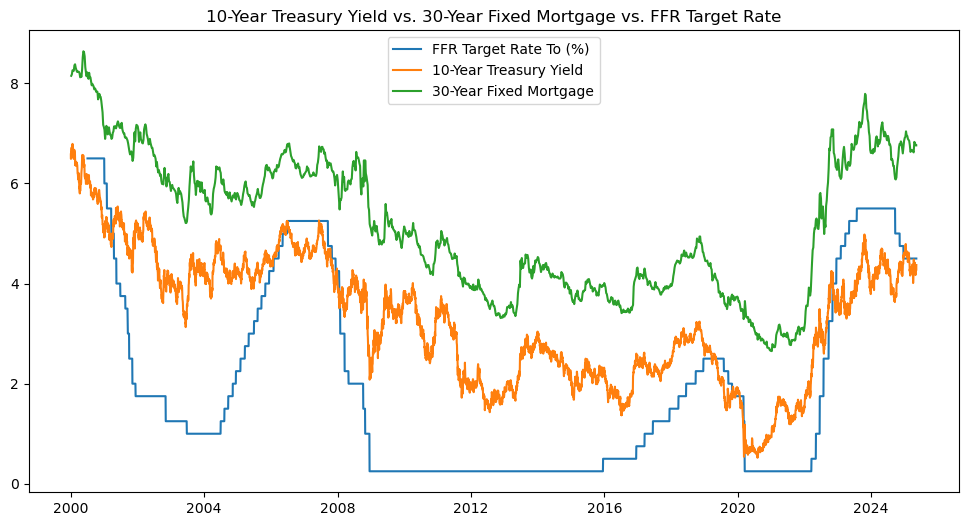

In [14]:
start_date = '2000-01-01'
end_date = '2025-05-09'

plt.figure(figsize=(12,6))

plt.plot(FFR.loc[start_date:end_date].index, FFR.loc[start_date:end_date, 'Target Rate To (%)'], label='FFR Target Rate To (%)')
plt.plot(nominal.loc[start_date:end_date].index, nominal.loc[start_date:end_date,'10 Yr'], label='10-Year Treasury Yield')
plt.plot(mortgage.loc[start_date:end_date].index, mortgage.loc[start_date:end_date,'Mortgage'], label='30-Year Fixed Mortgage')

plt.title('10-Year Treasury Yield vs. 30-Year Fixed Mortgage vs. FFR Target Rate')
plt.legend();

This suggests that long-term fixed mortgage rates are more closely tied to the 10-year Treasury yield than the FFR target rage. It also indicates that long-term interest rates often respond to investor expectations _before_ any actual change in the FFR occurs. In case of proactive tightening or easing, the Fed raises or cuts the FFR, and then the 10-year yield may follow _after_.

### Data Source:
[ECONOFACT: The 10-Year Treasury Rate — Why Is It Important and What Can Policy Do About It?](https://econofact.org/the-10-year-treasury-rate-why-is-it-important-and-what-can-policy-do-about-it) <br>
[CME Group: What Drives Long-Term Treasury Yields](https://www.cmegroup.com/insights/economic-research/2024/what-drives-long-term-treasury-yields.html) <br>
[Investopedia: 10-Year Treasury Bond Yield — What It Is and Why It Matters](https://www.investopedia.com/articles/investing/100814/why-10-year-us-treasury-rates-matter.asp) <br>
[Investopedia: Interest Rate Risk Between Long-Term and Short-Term Bonds](https://www.investopedia.com/ask/answers/05/ltbondrisk.asp) <br>
[smartasset: What the Breakeven Inflation Rate Tells Investors](https://smartasset.com/investing/breakeven-inflation)